<a href="https://colab.research.google.com/github/duckbillLvr/software-lecture/blob/main/lecture3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 핀터스텔라 라이브러리 설치

In [39]:
!pip install finterstellar

2. 핀터스텔라 라이브러리를 fs로 import

In [40]:
import finterstellar as fs

<p>3. MACD </p>
마이크로소프트 주식의 데이터를 불러오고 데이터 작성

In [42]:
df = fs.get_price('MSFT', start_date='2020-01-01', end_date='2020-12-31')

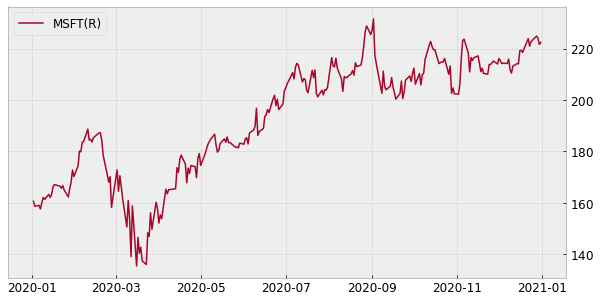

In [43]:
fs.draw_chart(df, right='MSFT')

<p>4. MACD 백 테스팅 </p>

In [44]:
fs.macd(df)

Symbols,MSFT,macd,macd_signal,macd_oscillator
Date,,,,
2020-01-02,160.62,0.00,0.00,0.00
2020-01-03,158.62,-0.04,-0.02,-0.02
2020-01-06,159.03,-0.04,-0.03,-0.01
2020-01-07,157.58,-0.10,-0.05,-0.05
2020-01-08,160.09,-0.02,-0.04,0.02
...,...,...,...,...
2020-12-24,222.75,2.24,1.37,0.87
2020-12-28,224.96,2.55,1.61,0.94
2020-12-29,224.15,2.69,1.82,0.87


5. MACD 백테스팅 macd, macd_signal, macd_oscillator columns 추가
- 실제 주가와도 비교

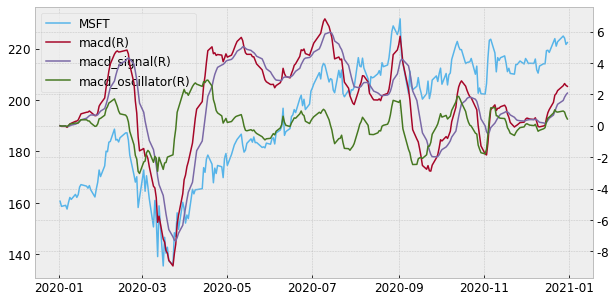

In [45]:
fs.draw_chart(df, left = ['MSFT'], right=['macd', 'macd_signal', 'macd_oscillator'])

6. MACD 백 테스팅
- macd_oscillator를 기준으로 buy와 zero를 비교

- position_chart가 1이면 buy, 0이면 zero



In [46]:
fs.indicator_to_signal(df, factor='macd_oscillator', buy=0, sell=0)

Date
2020-01-02    zero
2020-01-03    zero
2020-01-06    zero
2020-01-07    zero
2020-01-08     buy
              ... 
2020-12-24     buy
2020-12-28     buy
2020-12-29     buy
2020-12-30     buy
2020-12-31     buy
Name: trade, Length: 253, dtype: object

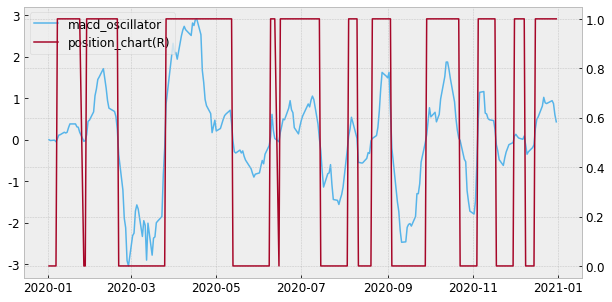

In [47]:
fs.position(df)
fs.draw_chart(df, right='position_chart', left='macd_oscillator')

7. 파이썬을 이용한 백 테스팅
- 백테스팅 결과 산출
- 수익률 작성

In [48]:
fs.evaluate(df, cost=0.001)
fs.performance(df, rf_rate=0.01)


CAGR: 23.49%
Accumulated return: 23.49%
Average return: 2.15%
Benchmark return : 38.48%
Number of trades: 11
Number of win: 6
Hit ratio: 54.55%
Investment period: 1.0yrs
Sharpe ratio: 0.77
MDD: -11.28%
Benchmark MDD: -28.24%


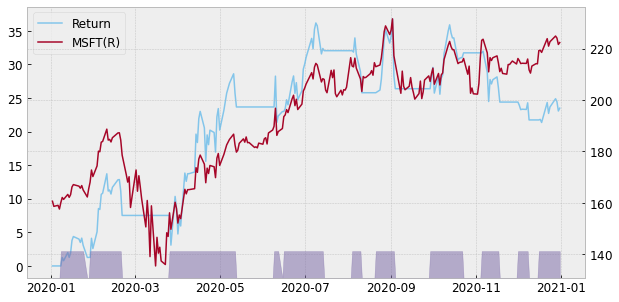

In [49]:
fs.draw_trade_results(df)

- CAGR: 23.49% 연평균수익률
-Accumulated return: 23.49% 누적 수익률(1년)
-Average return: 2.15% 평균 수익률
-Benchmark return : 38.48% 벤치마크 수익률(Buy&Hold 할 때의 수익률)
-Number of trades: 11 거래 횟수
-Number of win: 6 익절 횟수
-Hit ratio: 54.55% 익절 확률
-Investment period: 1.0yrs 투자 기간
-Sharpe ratio: 0.77 샤프 지수
-MDD: -11.28% MDD
-Benchmark MDD: -28.24% 벤치마트MDD



<h3> 모멘텀 vs 평균회귀 </h3>
<p> - 모멘텀 : 주식이 상승세일 때 흐름에 탑승하는 전략<br>
- 평균회귀 : 주식이 많이 하락했을 때 원 상태로 회복하길 기다리는 전략

<h3> RSI
<p> - 상대강도지수 : 주가의 상승 강도를 측정하기 위해 만들어졌다.<br>
- 일정 기간동안 상승폭과 하락폭을 계산하고 상승폭이 얼마나 큰지 비율을 계산해 백분율로 나타낸다.<br><br>

RSI = AU / ( AU + AD ) * 100<br>
AU = 일간 상승폭 평균<br>
AD = 일간 하락폭 평균



1. VZ 기업을 주가 불러오기

In [50]:
df = fs.get_price('VZ', start_date='2020-01-01', end_date='2020-12-31')

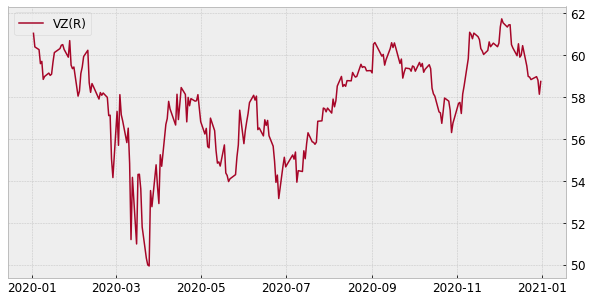

In [51]:
fs.draw_chart(df, right='VZ')

2. RSI 백 테스팅
- rsi를 계산하고 그래프로 작성

In [52]:
fs.rsi(df, w=14)

Symbols,VZ,rsi
Date,,
2020-01-02,61.05,NaN
2020-01-03,60.40,NaN
2020-01-06,60.27,NaN
2020-01-07,59.60,NaN
2020-01-08,59.71,NaN
...,...,...
2020-12-24,58.84,37.79
2020-12-28,58.98,39.57
2020-12-29,58.81,38.15


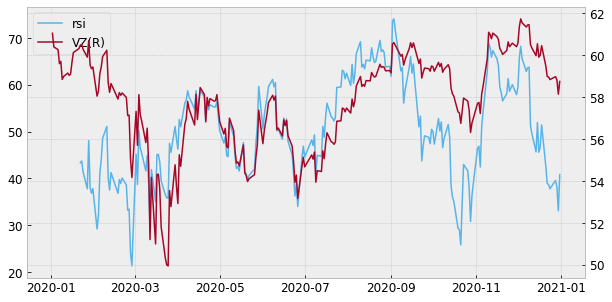

In [53]:
fs.draw_chart(df, left='rsi', right='VZ')

3. RSI 백 테스팅
- RSI 전략 백 테스팅 확인 (buy=30, sel=70) -> 평균 회귀 전략
- 수익률과 주가 움직임, 매매 지점을 알 수 있다.

In [57]:
fs.indicator_to_signal(df, factor='rsi', buy=30, sell=70)
fs.position(df)
fs.evaluate(df, cost=0.001)
fs.performance(df, rf_rate =0.01)

CAGR: 7.22%
Accumulated return: 6.80%
Average return: 4.17%
Benchmark return : -2.86%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.9yrs
Sharpe ratio: 0.21
MDD: -17.10%
Benchmark MDD: -18.20%


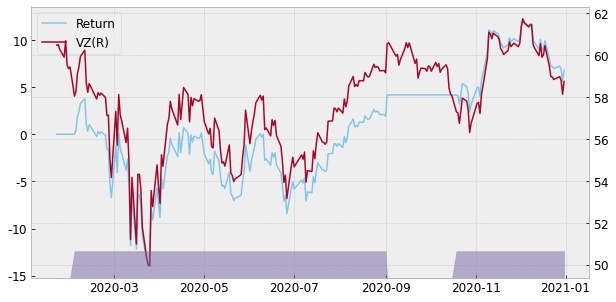

In [59]:
fs.draw_trade_results(df)

4. RSI 백 테스팅
- 모멘텀 전략 buy=70, sell=50

In [62]:
fs.indicator_to_signal(df, factor='rsi', buy=70, sell=50)
fs.position(df)
fs.evaluate(df, cost=0.001)
fs.performance(df, rf_rate=0.01)

CAGR: -2.94%
Accumulated return: -2.77%
Average return: -2.77%
Benchmark return : -2.86%
Number of trades: 1
Number of win: 0
Hit ratio: 0.00%
Investment period: 0.9yrs
Sharpe ratio: -1.17
MDD: -2.90%
Benchmark MDD: -17.73%


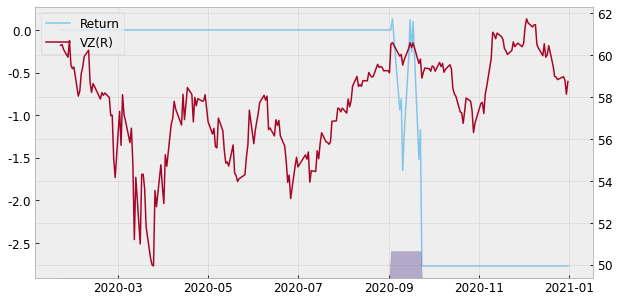

In [63]:
fs.draw_trade_results(df)

<h2> 엔벨로프
<p> - 엔벨로프는 이동평균을 이용한 보조지표, 이동평균선을 기준으로 영역을 만든다.<br>
- 엔벨로프 = 이동평균선 +-5%

1. BA(보잉) 기업의 주가 불러오기

In [68]:
df = fs.get_price('BA', start_date='2020-01-01', end_date='2020-12-31')

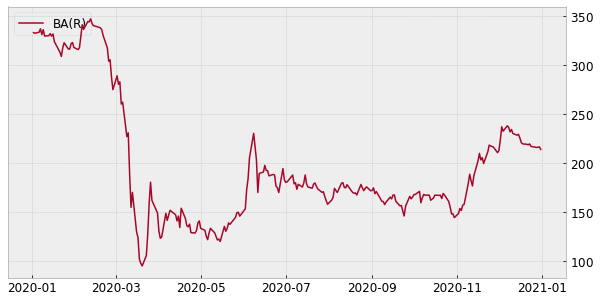

In [69]:
fs.draw_chart(df, right='BA')

2. envelope 백 테스팅
- 해당 주가의 엔벨로프를 구해준다.

In [76]:
fs.envelope(df, w=20, spread=0.1)
df.tail()

Symbols,BA,center,ub,lb
Date,,,,
2020-12-24,217.15,225.27,247.80,202.75
2020-12-28,216.09,225.25,247.78,202.73
2020-12-29,216.25,225.53,248.08,202.98
2020-12-30,216.67,225.71,248.28,203.14
2020-12-31,214.06,225.22,247.74,202.70


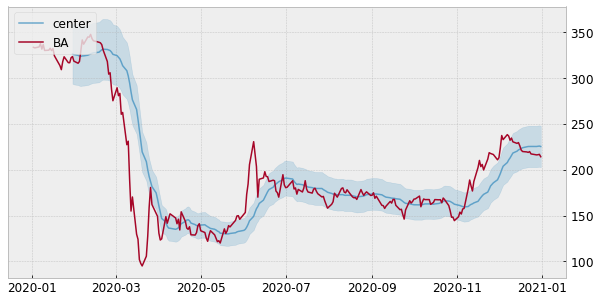

In [77]:
fs.draw_band_chart(df)

3. envelope 백 테스팅
- envelope 모멘텀 전략 A = buy, B = sell(zero)

In [78]:
fs.band_to_signal(df, buy='A', sell='B')

Date
2020-01-02    zero
2020-01-03    zero
2020-01-06    zero
2020-01-07    zero
2020-01-08    zero
              ... 
2020-12-24    zero
2020-12-28    zero
2020-12-29    zero
2020-12-30    zero
2020-12-31    zero
Name: trade, Length: 253, dtype: object

In [80]:
fs.position(df)
fs.evaluate(df, cost=0.001)
fs.performance(df, rf_rate=0.01)

CAGR: 38.38%
Accumulated return: 35.33%
Average return: 5.58%
Benchmark return : -33.79%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: 0.88
MDD: -26.49%
Benchmark MDD: -72.66%


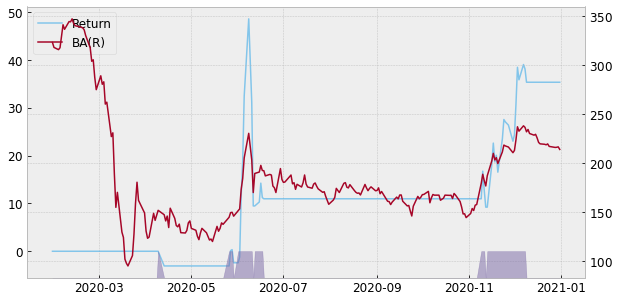

In [82]:
fs.draw_trade_results(df)

4. envelope 백 테스팅
- envelope 평균 회귀 전략 D = buy, B = zero

In [83]:
fs.band_to_signal(df, buy='D', sell='B')

Date
2020-01-30    zero
2020-01-31    zero
2020-02-03    zero
2020-02-04    zero
2020-02-05    zero
              ... 
2020-12-24    zero
2020-12-28    zero
2020-12-29    zero
2020-12-30    zero
2020-12-31    zero
Name: trade, Length: 234, dtype: object

In [86]:
fs.position(df)
fs.evaluate(df, cost=0.001)
fs.performance(df, rf_rate=0.01)

CAGR: -22.11%
Accumulated return: -20.35%
Average return: -0.36%
Benchmark return : -33.79%
Number of trades: 4
Number of win: 3
Hit ratio: 75.00%
Investment period: 0.9yrs
Sharpe ratio: -0.27
MDD: -67.16%
Benchmark MDD: -72.66%


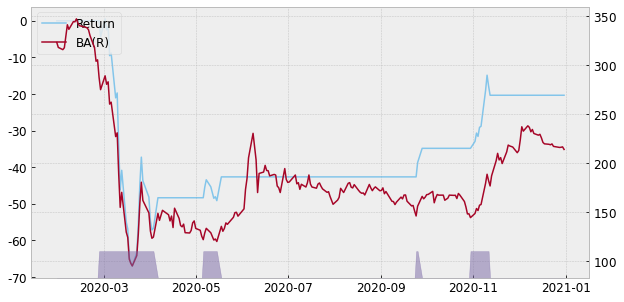

In [87]:
fs.draw_trade_results(df)

<h3> 변동성
<p> 미래의 불확실성 때문에 발생하는 투자수익의 변동성<br>
표준편차를 이용하여 예측한다<br>
- 투자자마다 기대이익과 위험에 대한 위험회피 정도는 다르다.<br>
- 개인마다 다른 기대이익과 위험에 대한 만족도를 계량화한 것을 효용(utility)라고 한다.<br>
- 변동성의 크기는 사람에 따라 가치가 다르다. <br>
-> 높은 변동성 = 높은 기대수익률<br>
-> 낮은 변동성 = 낮은 기대수익률

<h3> 볼린저밴드
<p> 볼린저밴드는 이동평균에 변동성을 결합한 그래프이다.<br>
차트의 모양은 엔벨로프와 비슷하다.<br>
이동평균선이 밴드의 중심축이 되고, 상단과 하단은 이동평균선 +- 표준편차(위험도)로 표시한다.<br>
<br>
볼린저밴드는 보통BB(N, k)로 표시<br>
- N : 이동평균을 구하는 ws<br>
- k : 표준편차의 몇 배를 반영할지 결정하는 변수<br>
ex) BB(20, 2) <- 20일 MA을 이용하여 표준편차의 2배를 밴드 사이즈로 잡는다
<br><br>
볼린저밴드 투자 전략<br>
- 모멘텀 전략 : A = buy, B = zero<br>
- 평균회귀 전략 : D = buy, B = zero</p>


1. TSM(TSMC) 기업의 주가 불러오기

In [90]:
df = fs.get_price('TSM', start_date='2020-01-01', end_date='2020-12-31')

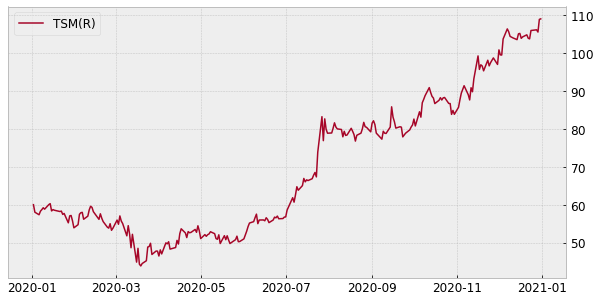

In [91]:
fs.draw_chart(df, right='TSM')

2. BollingerBand 백 테스팅
- 해당 주가의 BB(20, 2)를 구해준다.

In [94]:
fs.bollinger(df, w=20, k=2) # BB(20, 2)
df.tail()

Symbols,TSM,center,sigma,ub,lb
Date,,,,,
2020-12-24,105.97,103.23,2.62,108.48,97.98
2020-12-28,106.15,103.60,2.48,108.55,98.65
2020-12-29,105.56,104.03,1.96,107.96,100.10
2020-12-30,108.90,104.43,2.10,108.63,100.23
2020-12-31,109.04,104.91,2.01,108.92,100.89


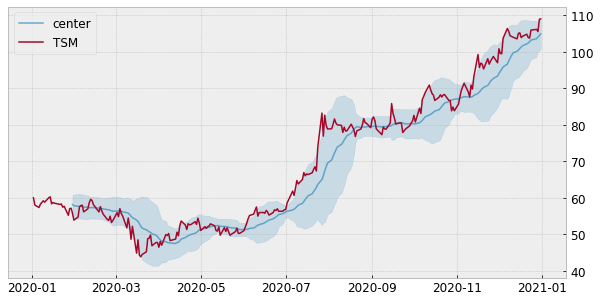

In [95]:
fs.draw_band_chart(df)

3. BollingerBand 백 테스팅
- BB(20, 2) 모멘텀 전략 : A = buy, B = zero

In [98]:
fs.band_to_signal(df, buy='A', sell='B')
fs.position(df)
fs.evaluate(df, cost=0.001)
fs.performance(df, rf_rate=0.01)

CAGR: 9.12%
Accumulated return: 8.40%
Average return: 0.86%
Benchmark return : 95.41%
Number of trades: 11
Number of win: 5
Hit ratio: 45.45%
Investment period: 0.9yrs
Sharpe ratio: 0.32
MDD: -13.76%
Benchmark MDD: -27.24%


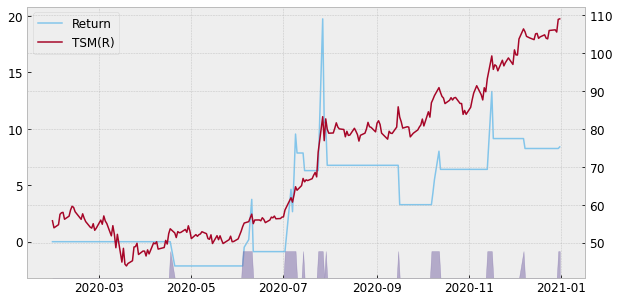

In [99]:
fs.draw_trade_results(df)

4. BollingerBand 백 테스팅
- BB(20, 2) 평균회귀 전략 : D = buy, B = sell

In [101]:
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.evaluate(df, cost=0.001)
fs.performance(df, rf_rate=0.01)

CAGR: 15.37%
Accumulated return: 14.15%
Average return: 4.53%
Benchmark return : 95.41%
Number of trades: 3
Number of win: 3
Hit ratio: 100.00%
Investment period: 0.9yrs
Sharpe ratio: 0.46
MDD: -15.97%
Benchmark MDD: -26.40%


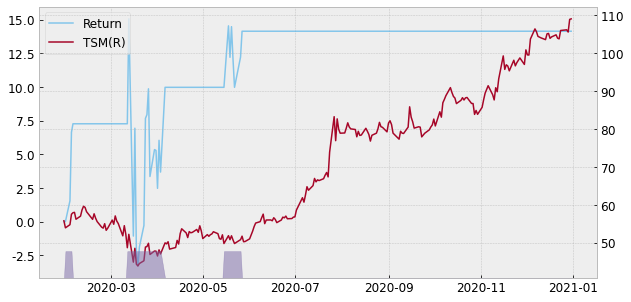

In [102]:
fs.draw_trade_results(df)

5. BollingerBand 백 테스팅
- BB(20, 1)-[모멘텀 전략+평균회귀 전략] : D에서 buy / B에서 zero
- 모멘텀 전략과 평균회귀 전략을 동시에 적용

In [104]:
df = fs.bollinger(df, w=20, k=1)
df['s1'] = fs.band_to_signal(df, buy='A', sell='B')
df['s2'] = fs.band_to_signal(df, buy='D', sell='B')

In [105]:
fs.combine_signal_or(df, 's1', 's2')

Symbols,TSM,center,ub,lb,trade,s1,s2
Date,,,,,,,
2020-01-30,55.80,NaN,NaN,NaN,zero,zero,zero
2020-01-31,53.94,NaN,NaN,NaN,zero,zero,zero
2020-02-03,54.77,NaN,NaN,NaN,zero,zero,zero
2020-02-04,57.52,NaN,NaN,NaN,zero,zero,zero
2020-02-05,57.92,NaN,NaN,NaN,zero,zero,zero
...,...,...,...,...,...,...,...
2020-12-24,105.97,103.23,105.86,100.61,buy,buy,zero
2020-12-28,106.15,103.60,106.08,101.13,buy,buy,zero
2020-12-29,105.56,104.03,105.99,102.07,zero,zero,zero


CAGR: 57.85%
Accumulated return: 48.82%
Average return: 1.85%
Benchmark return : 104.62%
Number of trades: 26
Number of win: 11
Hit ratio: 42.31%
Investment period: 0.8yrs
Sharpe ratio: 1.11
MDD: -20.23%
Benchmark MDD: -26.40%


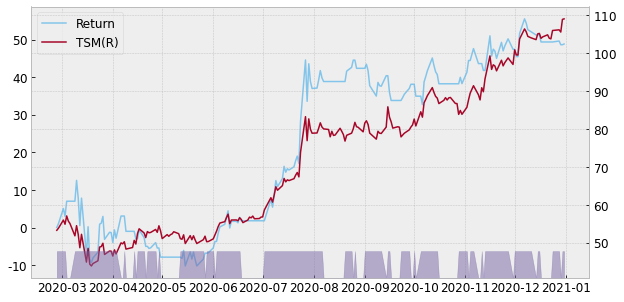

In [106]:
fs.position(df)
fs.evaluate(df, cost=0.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

<h3> 스토캐스틱 </h3>
<p> - 스토캐스틱 지표는 최근 N일간 주가 범위 중 현재 주가가 얼마나 높이 있는가 이다.<br>
스토캐스틱 지표는 주가 수준을 잘 보여주지만 너무 들쭉날쭉해서 그대로 사용하기에는 어렵다 이럴때는 MA(Moving average)를 하여 평탄화 작업을 해준다.

1. DAL(델타항공) 기업의 주가 불러오기
- stochastic 지수를 구하기 위해서는 단순한 주가만 필요한 것이 아니라 OHLC 전부 필요

In [110]:
df = fs.get_ohlc('DAL', start_date='2020-01-01', end_date='2020-12-31')
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,40.44,39.60,40.42,39.73,"5,176,400.00",39.73
2020-12-28,40.78,40.01,40.27,40.15,"10,654,400.00",40.15
2020-12-29,40.84,39.90,40.84,40.03,"8,142,800.00",40.03
2020-12-30,40.91,39.89,40.00,40.56,"8,504,600.00",40.56
2020-12-31,40.74,39.76,40.30,40.21,"8,705,700.00",40.21


2. Stochastic 백 테스팅
- STO(14, 3, 3)

In [111]:
fs.stochastic(df, 'DAL', n=14, m=3, t=3)

,DAL,slow_k,slow_d
Date,,,
2020-01-02,59.04,NaN,NaN
2020-01-03,58.06,NaN,NaN
2020-01-06,57.66,NaN,NaN
2020-01-07,57.61,NaN,NaN
2020-01-08,58.85,NaN,NaN
...,...,...,...
2020-12-24,39.73,17.11,18.44
2020-12-28,40.15,25.84,20.44
2020-12-29,40.03,24.35,22.43


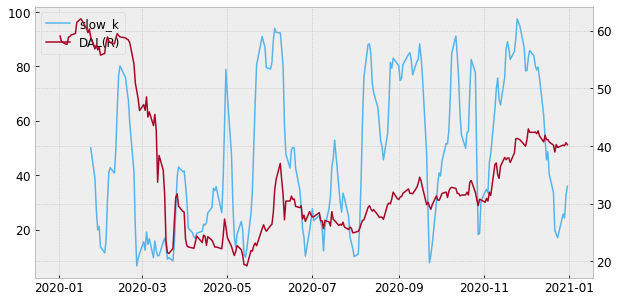

In [112]:
fs.draw_chart(df, left='slow_k', right='DAL')

3. 스토캐스틱 백테스팅
- 모멘텀 전략 buy = 80 zero = 20
- 스토캐스틱 - 평균회귀 전략
> buy : slow_k-slow_d >= 0
> zero : slow_k-slow_d < 0

CAGR: -2.69%
Accumulated return: -2.49%
Average return: 0.36%
Benchmark return : -30.05%
Number of trades: 5
Number of win: 3
Hit ratio: 60.00%
Investment period: 0.9yrs
Sharpe ratio: -0.07
MDD: -32.09%
Benchmark MDD: -69.06%


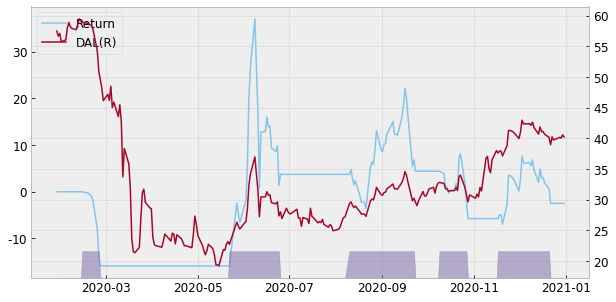

In [113]:
fs.indicator_to_signal(df, factor='slow_k', buy=80, sell=20)
fs.position(df)
fs.evaluate(df, cost=0.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [115]:
df['indicator'] = df['slow_k'] - df['slow_d']
df.tail()

,DAL,slow_k,slow_d,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd,exs_rtn_daily,indicator
Date,,,,,,,,,,,,,,
2020-12-24,39.73,17.11,18.44,zero,zz,0,1.00,1.00,0.98,-2.49,0.71,0.64,-0.00,-1.33
2020-12-28,40.15,25.84,20.44,zero,zz,0,1.00,1.00,0.98,-2.49,0.71,0.65,-0.00,5.40
2020-12-29,40.03,24.35,22.43,zero,zz,0,1.00,1.00,0.98,-2.49,0.71,0.65,-0.00,1.92
2020-12-30,40.56,32.62,27.60,zero,zz,0,1.00,1.00,0.98,-2.49,0.71,0.65,-0.00,5.02
2020-12-31,40.21,35.93,30.97,zero,zz,0,1.00,1.00,0.98,-2.49,0.71,0.65,-0.00,4.96


CAGR: -2.96%
Accumulated return: -2.74%
Average return: 0.69%
Benchmark return : -30.05%
Number of trades: 29
Number of win: 11
Hit ratio: 37.93%
Investment period: 0.9yrs
Sharpe ratio: -0.06
MDD: -53.57%
Benchmark MDD: -67.73%


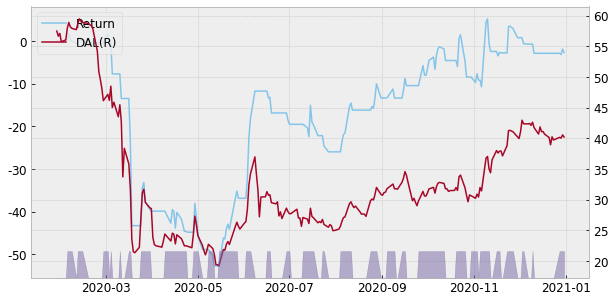

In [116]:
fs.indicator_to_signal(df, factor='indicator', buy=0, sell=0)
fs.position(df)
fs.evaluate(df, cost=0.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)